In [32]:
import numpy as np

from scipy.optimize import minimize

import matplotlib.pyplot as plt

In [35]:
def forward(X,theta):
    res = 0
    for i in range(len(theta)):
        res += theta[i] * np.power(X,i) 
    return res
        
        
        
        

def loss(theta):
    data=np.linspace(0.01,1,100)
    pred = forward(data,theta)
    return np.linalg.norm(pred-np.log(data))

In [36]:

X=np.linspace(0.01,1,100)

In [61]:
theta_init = [1,1,1,1]

In [62]:
theta = minimize(loss, theta_init)

In [86]:
coeff=theta.x
coeff

array([ -3.69404813,  13.30907268, -19.06853265,   9.63445963])

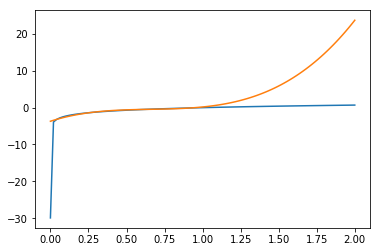

In [64]:
local_X = np.linspace(0.0000000000001, 2,100)
plt.plot(local_X,np.log(local_X))
plt.plot(local_X, forward(local_X, theta.x))

In [82]:
def cross_ent_approx(Y, theta,pred):
    return -pred*forward(Y,theta)-(1-pred)*forward((1-Y), theta)
def cross_ent(Y, pred):
    return -pred*np.log(Y)-(1-pred)*np.log(1-Y)

/home/apignet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/apignet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


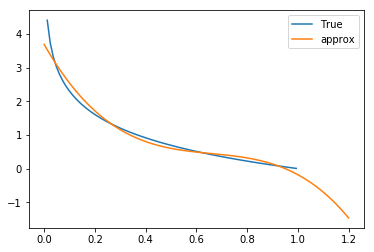

In [83]:
local_X = np.linspace(0, 1.2,100)
plt.plot(local_X, cross_ent(local_X, 1), label='True')
plt.plot(local_X,cross_ent_approx(local_X,coeff, 1),label='approx')
plt.title("Cross ent loss, target 1")
plt.legend()

/home/apignet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/apignet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/apignet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


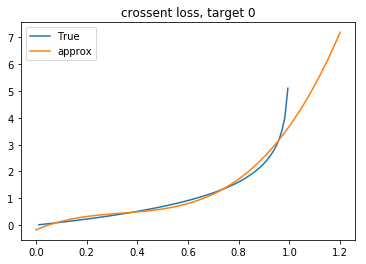

In [85]:
local_X = np.linspace(0, 1.2,100)
plt.plot(local_X, cross_ent(local_X, 0), label='True')
plt.plot(local_X,cross_ent_approx(local_X,coeff, 0),label='approx')
plt.title("crossent loss, target 0")
plt.legend()